In [1]:
#Damián Guadalupe Tijerina Peña
#A00827880

# 1.- Introducción

Frecuentemente, entre el fútbol, se es buscado observar la forma de los juegos desde un punto de vista estadístico. A partes como a los clubes, directores técnicos e incluso personas que se dedican a realizar apuestas deportivas les interesa estar actualizadandose constantemente sobre la información recabada de una cierta liga, de este modo se puede partir a realizar distintos estudios, relaciones y conclusiones que ayuden a perseguir y conseguir los objetivos de la parte interesada. 

Estos objetivos dependen mucho de la forma de negocio que sea manejada, no se puede decir que un club y su director técnico utilizan a los datos de la misma manera que un apostador. Aunque puede haber similitudes entre la forma en que son tratados los datos, las variables que se utilizan, modelos y conclusiones es importante desde un inicio tener un objetivo predefinido que funja como guía para análisis determinados. 

En esta investigación se tomará el punto de vista de la directiva de un club que desea conocer a los equipos con un mejor rendimiento en cuánto a goles refiere. De esta manera, determinar cuáles son las características de los equipos más goleadores en la liga y así poder tomar una decisión en cuánto al estilo de juego del próximo director técnico para tener buenos resultados tanto deportivos como económicos. 

Es por ello que se utilizará una base de datos con estadísticas de los jugadores de la Liga Premier de Inglaterra en la temporada 2020-2021. En esta se puede encontrar información como el nombre del jugador, club al que partenece, nacionalidad, posición, edad, goles, asistencias, pases intentados, entre muchas otras, que servirán para completar la investigación

# 2.- Variables críticas

Para iniciar se realizará una exploración de la información que la base de datos contiene, conocer las variables que se encuentran, determinar aquellas que sean críticas e importantes de acuerdo al objetivo de la investigación así como su comportamiento y relación con las demás variables significativas.

2.1 Lectura de base de datos

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm
import plotly.express as px



df=pd.read_csv('datasets/EPL_20_21.csv')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [3]:
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

In [4]:
df.shape

(532, 18)

In [5]:
df.dtypes

Name                      object
Club                      object
Nationality               object
Position                  object
Age                        int64
Matches                    int64
Starts                     int64
Mins                       int64
Goals                      int64
Assists                    int64
Passes_Attempted           int64
Perc_Passes_Completed    float64
Penalty_Goals              int64
Penalty_Attempted          int64
xG                       float64
xA                       float64
Yellow_Cards               int64
Red_Cards                  int64
dtype: object

# 2.2 Determinación de variables críticas

Retomando el objetivo planteado en la introducción, se desea conocer el rendimiento por club, es decir que la variable de los jugadores no es un factor que se vaya a considerar a lo largo de los estudios. Como primer filtro se eliminará de lo que denominaremos "variables críticas" al atributo que contiene el nombre del jugador. En cuanto a las variables categóricas la nacionalidad de los jugadores no es una cualidad que se considere relevante para el caso de estudio ya que se desea conocer el rendimiento deportivo de los clubes como un conjunto. Cuestiones como la nacionalidad pueden entrar en cuestión en situaciones en las que se desee estudiar la composición de un conjunto por invidual.

Siguiendo esta línea como variables categóricas serán consideradas el club y la posición.

Como segundo filtro se tomará en cuenta los resultados de un análisis de correlación entre las variables numéricas para observar las dependencias y los posibles efectos que puedan tener entre sí.

In [6]:
variables_numericas=['Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards']
df[variables_numericas].corr()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
Age,1.000000,0.149628,0.156387,0.158643,0.047022,0.026740,0.120244,0.122812,0.084547,0.083328,-0.056098,-0.047849,0.115191,0.065414
Matches,0.149628,1.000000,0.938116,0.947351,0.441977,0.508009,0.785362,0.085462,0.227929,0.234389,0.192047,0.227570,0.578093,0.168281
Starts,0.156387,0.938116,1.000000,0.997031,0.405381,0.477704,0.853448,0.086039,0.216877,0.221418,0.072487,0.113446,0.603497,0.195383
Mins,0.158643,0.947351,0.997031,1.000000,0.400398,0.474677,0.855600,0.085460,0.219027,0.224115,0.075016,0.117602,0.604634,0.193038
Goals,0.047022,0.441977,0.405381,0.400398,1.000000,0.617831,0.201526,-0.025137,0.594730,0.590492,0.681959,0.348428,0.104413,0.057785
Assists,0.026740,0.508009,0.477704,0.474677,0.617831,1.000000,0.393906,-0.016645,0.408459,0.411784,0.383358,0.558677,0.213691,-0.020855
Passes_Attempted,0.120244,0.785362,0.853448,0.855600,0.201526,0.393906,1.000000,0.228393,0.149533,0.157020,-0.092535,0.105132,0.634567,0.208003
Perc_Passes_Completed,0.122812,0.085462,0.086039,0.085460,-0.025137,-0.016645,0.228393,1.000000,-0.024517,-0.014934,-0.035313,0.047720,0.162451,0.054068
Penalty_Goals,0.084547,0.227929,0.216877,0.219027,0.594730,0.408459,0.149533,-0.024517,1.000000,0.982176,0.407251,0.205417,0.057846,0.021109
Penalty_Attempted,0.083328,0.234389,0.221418,0.224115,0.590492,0.411784,0.157020,-0.014934,0.982176,1.000000,0.420159,0.218949,0.063506,0.031073


Tomando el mismo pensamiento en la no consideración de la variable del jugador, después del análisis de correlación se puede conrirmar que para las variables 'Matches', 'Starts' y 'Mins' no existe una correlación con otras variables que den información útil o relevante para la investigación. De nuevo, estas son variables que fueron sujetas a los jugadores de manera individual, sin embargo la consideración en el estudio es desde una perspectiva en conjunto por lo que no aportan datos importantes. Por consecuencia no serán consideradas dentro del conjunto de variables críticas. 

Una vez habiendo hecho esto podemos definir el nuevo 'dataframe' que tendrá únicamente a las variables críticas.

In [7]:
df.drop(['Name','Nationality','Matches', 'Starts','Mins'], 
        axis = 1, 
        inplace = True
       )

In [8]:
df.head()

,Club,Position,Age,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Chelsea,"MF,FW",21,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Chelsea,GK,28,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Chelsea,FW,24,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Chelsea,DF,23,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Chelsea,DF,20,1,2,1987,85.0,0,0,0.06,0.12,3,0


# 3.- Escenarios considerados

Las preguntas que se contestarán en esta investigación son las siguientes:

-¿Qué equipos de la Liga Premier en la temporada 2020-2021 tuvieron el mejor rendimiento de gol?

-¿Cuál es la forma en que los pases y las asistencias se comportan en los equipos mencionados en la pregunta anterior?

-¿Cuál es la edad promedio que conforma a las plantillas con el mejor rendimiento de gol?

-¿Cuál es el estado en cuanto a tarjetas amarillas y rojas de los estos equipos?, ¿En que nivel esto afecta su modo de juego?

-¿Cómo se desarrollan las posiciones a la hora de marcar un gol?

-¿Existen diferentes estilos de juegos?

-¿Cuáles son las características más importantes de los equipos que tuvieron el mejor rendimiento de gol?

-¿Se puede realizar alguna predicción con alguna de las variables en la base de datos?



# 4.- Stakeholders

Como se establece en la introducción de la investigación, se tomará la perspectiva de un club que le interesa realizar un análisis de los datos y obtener información relevante en cuanto al rendimiento de los goles. Para permitir una toma de decisiones adeucada en los ámbitos técnicos, financieros y operativos. 
Así, los stakeholders o las partes interesadas son todos los clubes de fútbol que tienen el mismo interés, aquellos que deseen analizar la información para evaluar su situación, para identificar áreas de mejora o para estructurar un nuevo plan que les traiga beneficios.

# 5.- Desarrollo del estudio

# 5.1 Equipos con mejor promedio de gol en la liga

Primeramente hay que visualizar cuáles son los equipos que cuentan con un mejor promedio de gol en la liga. Es decir, cuáles son aquellos que su promedio de gol está por encima del de la liga por completo ya que estos harán referencia a, si tienen un alto promedio de goles, significa que la cantidad que anotaron fue bastante alta

In [16]:
Goles = pd.pivot_table(df,
                      index='Club',
                      values='Goals',
                      aggfunc='mean')

In [17]:
Media_goles=pd.Series.mean(df['Goals'])

In [18]:
Goles= Goles[Goles['Goals']>Media_goles]
Goles.shape

(9, 1)

In [19]:
Goles.head(9)

,Goals
Club,
Aston Villa,2.166667
Chelsea,2.074074
Leeds United,2.608696
Leicester City,2.370370
Liverpool FC,2.321429
Manchester City,3.416667
Manchester United,2.413793
Tottenham Hotspur,2.750000
West Ham United,2.500000


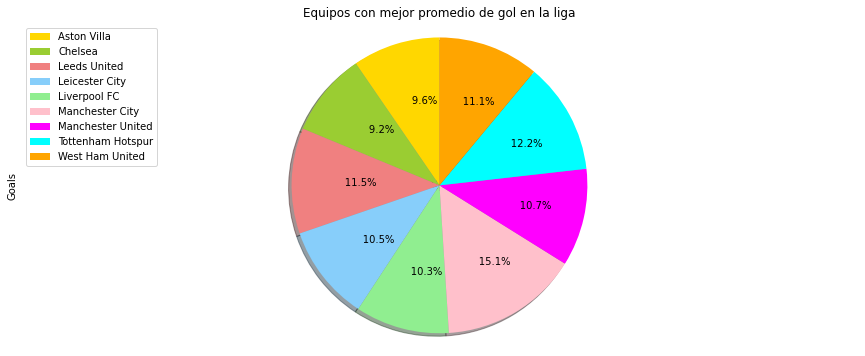

In [20]:
color_list=['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink','magenta','cyan','orange']

Goles['Goals'].plot(kind='pie',
                    figsize=(15,6),
                    autopct= '%10.1f%%',
                    startangle = 90,
                    shadow = True,
                    labels=None,
                    colors= color_list)
plt.title('Equipos con mejor promedio de gol en la liga')
plt.axis('equal')
plt.legend(labels=Goles.index, loc='upper left')
plt.show()

En este gráfico de pastel se pueden ver a los equipos que su promedio de gol está por encima del considerado en toda la liga premier. En sí se filtraron los equipos que cumplieran esa condición, y de ellos se tomó un porcentaje total. Esto quiere decir que los nueve equipos que se muestran en el gráfico son los que tienen mayores goles anotados en la liga, siendo el equipo "Manchester City" con mayores goles anotados puesto que su promedio de goles es el que sobre sale de entre los más destacados. Esta información da paso a que se puedan visualizar con mayor cautela a estos equipos, sus acciones, sus movimientos tanto deportivos como técnicos, administrativos y financieros debido a que puede traer un impacto positivo.

# 5.2 Asistencias, pases intentados y completados

Ahora tenemos un análisis a las asistencias, pases intentados y completados. Más que nada lo que se desea saber aquí es qué rangos en estos tres atributos cumplen que les ayuda a tener buenos resultados. De acuerdo al estilo de juego del futbol, los goles se logran mediante estrategias, mismo que requiere que haya pases intentados, completado y que terminen en asistencias (pases que terminaron en goles).

In [21]:
Pases = pd.pivot_table(df,
                      index='Club',
                      values=['Goals','Assists', 'Passes_Attempted', 'Perc_Passes_Completed'],
                      aggfunc='mean')
Pases.head()

,Assists,Goals,Passes_Attempted,Perc_Passes_Completed
Club,,,,
Arsenal,1.310345,1.827586,734.172414,81.262069
Aston Villa,1.583333,2.166667,689.833333,76.795833
Brighton,0.888889,1.444444,720.592593,71.988889
Burnley,0.800000,1.280000,601.720000,67.456000
Chelsea,1.407407,2.074074,931.518519,84.033333


In [22]:
Pases= Pases[Pases['Goals']>Media_goles]
Pases.shape

(9, 4)

In [23]:
Asistencias = Pases['Assists']
PasesIntentados = Pases['Passes_Attempted']
PorcPasesCompletados=Pases['Perc_Passes_Completed']

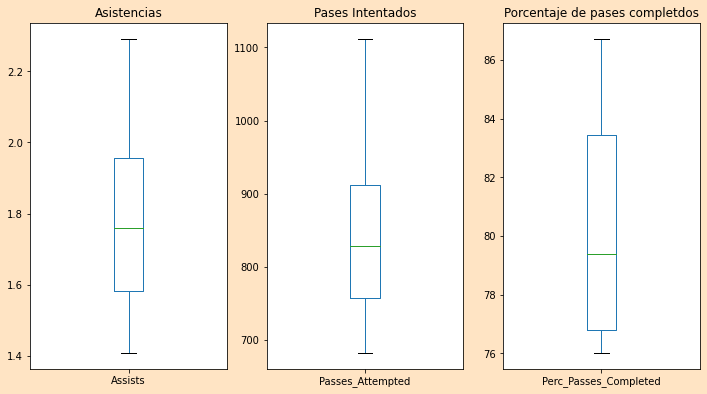

In [24]:
plt.figure(figsize=(13,15), facecolor='bisque')

plt.subplot(2,3,1)
Asistencias.plot(kind='box', figsize=(12, 14))
plt.title("Asistencias")

plt.subplot(2,3,2)
PasesIntentados.plot(kind='box', figsize=(12, 14))
plt.title("Pases Intentados")

plt.subplot(2,3,3)
PorcPasesCompletados.plot(kind='box', figsize=(12, 14))
plt.title("Porcentaje de pases completdos")


plt.show()

En este caso lo que más se puede resaltar de entre las gráficas es el porcentaje de pases completados por los equipos con mayores promedios de gol. El razon de su porcentaje va desde 76% hasta alrededor de 87%, esto quiere decir que su estrategia y táctica es tal que tienen ese rango de efectividad en sus pases la mayoría del partido. Además el rango de sus pases intentados es de un valor alto, esto quiere indicar que para poder avanzar al campo rival efectúan una gran cantidad de pases lo que se traduce en una cantidad significativa de movimientos a la vez por parte de los jugadores y la acertividad puede ser un indicio de preferencia por la posición de la pelota.

# 5.3 Edad

La edad es una de las variables que tienen relevancia en este punto. Frecuentemente los clubes de fútbol optan por la compra de jugadores que sean menores de 30 años, claramente habrá excepciones pero entre ese rango es considerado como aceptable para encontrar jugadores en buena forma, prometedores y con futuro. 

In [25]:
df.columns

Index(['Club', 'Position', 'Age', 'Goals', 'Assists', 'Passes_Attempted',
       'Perc_Passes_Completed', 'Penalty_Goals', 'Penalty_Attempted', 'xG',
       'xA', 'Yellow_Cards', 'Red_Cards'],
      dtype='object')

In [26]:
Edad = pd.pivot_table(df,
                      index='Club',
                      values=['Age','Goals'],
                      aggfunc='mean')
Edad.head()

,Age,Goals
Club,,
Arsenal,24.965517,1.827586
Aston Villa,24.291667,2.166667
Brighton,24.555556,1.444444
Burnley,27.040000,1.280000
Chelsea,25.592593,2.074074


In [27]:
Edad= Edad[Edad['Goals']>Media_goles]

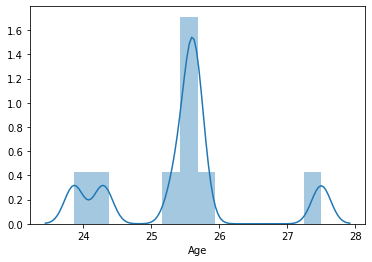

In [28]:
sns.distplot(Edad.Age)
plt.show()

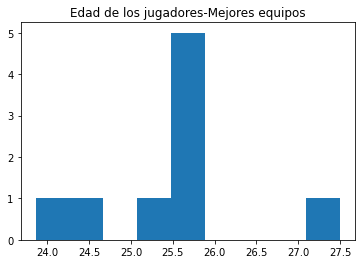

In [29]:
x=Edad['Age'].values
plt.hist(x = x, 
         bins = 9
        )
plt.title("Edad de los jugadores-Mejores equipos")
plt.show()

En cuanto a la edad se tomaron histogramas con diferente estilo de visualización para comparar desde distintas perspectivas. Observamos que se encuentran casos, en los equipos con mejor promedio de gol, en el que la edad ronda entre los 24 y 25 años, la mayoría se registra que en promedio tienen entre 25 y 26 años, siendo pocos los que alcanzan los 27. Una cosa que se puede remarcar es que en promedio sus jugadores se mantienen en una edad debajo de los 30, retomando la aclaración puede haber excepciones y que tengamos estos resultados ahora no indica que no existan jugadores de 30 años o más dentro de los equipos, más bien lo que nos dice esta visualización es que las plantillas de estos equipos se estructuran por jugadores en su mayoría jóvenes, los casos en los que los futbolistas alcanzan su máximo rendimiento entre la edad de 25 a 30 años son incontables.

# 5.4 Tarjetas amarillas y rojas

En el caso de las tarjetas amarillas y rojas, estas dos variables pueden resultar de gran importancia si se relaciona con el estilo de juego que implementen los equipos. Existen estilos de juego defensivos, ofensivos, con posesión, a contragople, físicos o de contacto, al contacto, entre otros. En este caso se realizarán diagramas de cajas para observar como se distribuyen las tarjetas entre los equipos con mejores promedios de gol.

In [30]:
Tarjetas = pd.pivot_table(df,
                      index='Club',
                      values=['Yellow_Cards','Goals','Red_Cards'],
                      aggfunc='mean')
Tarjetas.head()

,Goals,Red_Cards,Yellow_Cards
Club,,,
Arsenal,1.827586,0.172414,1.689655
Aston Villa,2.166667,0.166667,2.958333
Brighton,1.444444,0.222222,1.814815
Burnley,1.280000,0.000000,1.920000
Chelsea,2.074074,0.111111,1.888889


In [31]:
Tarjetas= Tarjetas[Tarjetas['Goals']>Media_goles]
Tarjetas.shape

(9, 3)

In [32]:
TarjetasAmarillas = Tarjetas['Yellow_Cards']
TarjetasRojas = Tarjetas['Red_Cards']

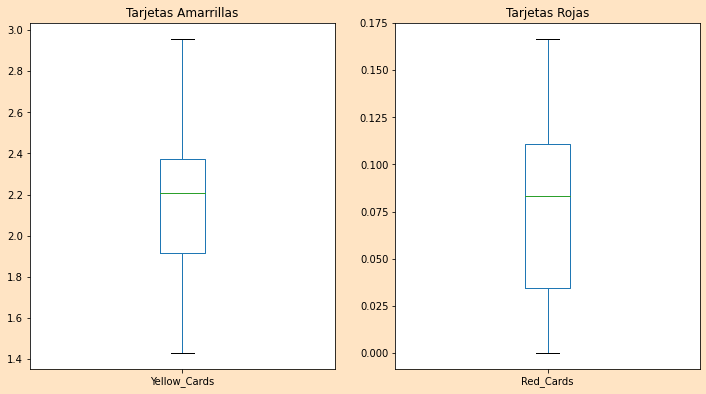

In [33]:
plt.figure(figsize=(13,15), facecolor='bisque')

plt.subplot(2,2,1)
TarjetasAmarillas.plot(kind='box', figsize=(12, 14))
plt.title("Tarjetas Amarrillas")

plt.subplot(2,2,2)
TarjetasRojas.plot(kind='box', figsize=(12, 14))
plt.title("Tarjetas Rojas")

plt.show()

Una de las cosas que se pueden destacar entre estos gráficos es que para las tarjetas amarillas el rango va desde 1.4 hasta 3, lo que puede ser un indicador de que el tipo de juego de estos equipos utiliza frecuentemente el contacto. El juego de contacto moderado o elevado es utilizado por una variedad de clubes de forma estrategica, una de los prpósitos que se pueden mencionar es para cortar el ritmo de sus jugadores, sin embargo para las tarjetas rojas se ve un rango sumamente bajo en donde no alcanza a tocar el valor numérico 1, haciendo referencia a que aunque sus amonestaciones tengan un número alto sus expulsiones son bajas, sugiriendo que quienes cometen las faltas para frenar el juego contrario tienen que cumplir la condición de no estar sancionados o de estar turnando las faltas para no acumularlas hasta tal punto de ser sancionados.

# 5.5 Posiciones

Otra de las variables a tomar en cuenta son las posiciones. Para este caso se tomarán las variables de 'Position' y 'Goals' y formar una tabla pivote en la que se pueda observar los goles en promedio que han tenido las posiciones para cada club.

In [34]:
Posicion = pd.pivot_table(df,
                      index='Club',
                      values=['Goals'],
                      columns=['Position'],
                      aggfunc='mean',
                      margins='True',
                      margins_name='Promedio total')
Posicion.head()

Goals                                                       \
Position           DF DF,FW DF,MF        FW FW,DF     FW,MF   GK        MF   
Club                                                                         
Arsenal      0.454545   NaN   NaN  6.166667   5.0  1.000000  0.0  0.400000   
Aston Villa  0.714286   NaN   NaN  6.600000   NaN  2.333333  0.0  1.000000   
Brighton     1.833333   NaN   0.0  2.666667   0.0  3.250000  0.0  0.333333   
Burnley      0.714286   NaN   0.0  4.500000   NaN  0.500000  0.0  1.000000   
Chelsea      1.500000   NaN   NaN  4.000000   2.0  3.000000  0.0  1.400000   

                                        
Position    MF,DF MF,FW Promedio total  
Club                                    
Arsenal       1.0   2.0       1.827586  
Aston Villa   NaN   0.0       2.166667  
Brighton      2.0   1.0       1.444444  
Burnley       NaN   NaN       1.280000  
Chelsea       NaN   5.0       2.074074

In [35]:
Posicion.head(20)

Goals                                         \
Position                       DF DF,FW DF,MF         FW FW,DF     FW,MF   
Club                                                                       
Arsenal                  0.454545   NaN   NaN   6.166667   5.0  1.000000   
Aston Villa              0.714286   NaN   NaN   6.600000   NaN  2.333333   
Brighton                 1.833333   NaN   0.0   2.666667   0.0  3.250000   
Burnley                  0.714286   NaN   0.0   4.500000   NaN  0.500000   
Chelsea                  1.500000   NaN   NaN   4.000000   2.0  3.000000   
Crystal Palace           0.400000   NaN   NaN   6.000000   NaN  1.000000   
Everton                  1.000000   0.0   0.0   4.600000   1.0  3.000000   
Fulham                   0.272727   1.0   NaN   3.000000   0.0  2.500000   
Leeds United             0.571429   NaN   3.0  17.000000   NaN       NaN   
Leicester City           0.900000   1.0   NaN   6.750000   NaN  9.000000   
Liverpool FC             0.600000   NaN   0.0  10.200000   NaN  1.000000   
Manchester City          1.222222   NaN   NaN   7.000000   NaN  6.666667   
Manchester United        0.600000   NaN   NaN   4.000000   NaN  1.000000   
Newcastle United         0.666667   NaN   1.0   6.500000   NaN  2.000000   
Sheffield United         0.300000   0.0   0.0   1.200000   NaN  4.000000   
Southampton              0.444444   NaN   0.0   5.250000   NaN  0.500000   
Tottenham Hotspur        0.333333   NaN   NaN  10.400000   NaN  1.666667   
West Bromwich Albion     0.666667   NaN   NaN   1.666667   NaN  2.000000   
West Ham United          1.428571   0.5   NaN   6.500000   0.0  2.800000   
Wolverhampton Wanderers  0.636364   NaN   NaN   2.200000   NaN  2.000000   

                                                                            
Position                       GK        MF MF,DF     MF,FW Promedio total  
Club                                                                        
Arsenal                  0.000000  0.400000   1.0  2.000000       1.827586  
Aston Villa              0.000000  1.000000   NaN  0.000000       2.166667  
Brighton                 0.000000  0.333333   2.0  1.000000       1.444444  
Burnley                  0.000000  1.000000   NaN       NaN       1.280000  
Chelsea                  0.000000  1.400000   NaN  5.000000       2.074074  
Crystal Palace           0.000000  1.500000   NaN  1.000000       1.625000  
Everton                  0.000000  1.142857   0.0  0.500000       1.551724  
Fulham                   0.000000  0.400000   5.0  1.000000       0.928571  
Leeds United             0.000000  3.800000   0.0  3.666667       2.608696  
Leicester City           0.000000  1.200000   1.0  2.750000       2.370370  
Liverpool FC             0.333333  1.000000   0.5  0.500000       2.321429  
Manchester City          0.000000  5.250000   NaN  2.000000       3.416667  
Manchester United        0.000000  4.600000   NaN  2.000000       2.413793  
Newcastle United         0.000000  1.833333   0.0  4.000000       1.629630  
Sheffield United         0.000000  0.200000   1.0       NaN       0.703704  
Southampton              0.000000  2.000000   NaN  1.750000       1.620690  
Tottenham Hotspur        0.000000  1.000000   NaN       NaN       2.750000  
West Bromwich Albion     0.000000  0.444444   NaN  3.000000       1.100000  
West Ham United          0.000000  4.000000   NaN  5.000000       2.500000  
Wolverhampton Wanderers  0.000000  2.000000   1.0  1.500000       1.259259

Como se puede observar en la tabla pivote, se dividen los goles que ha metido en promedio cada posición para cada club de la liga completa. En la columna final se tiene una columna llamada "Promedio total" en la que se puede comparar como la combinación de cada posición tiene impacto en el final. Se tiene que recordar que el promedio de goles es un promedio de promedios entre posiciones, por lo que valores bajos y altos afectan en el final. Visualizarlo de esta manera puede ver la realidad de promedios por posición y además observar en qué medida diferentes áreas del equipo tienen un impacto en la llegada del gol. 
 
Como ejemplo de ello es el caso de Manchester City, el equipo con el mejor promedio de gol de toda la liga. El promedio de gol que tienen su campo delantero y medio es arriba de cinco, relativamente alto, en cuando a su defensa su contribución es baja, pero nos arroja la información de que en su plantilla los jugadores que tienen roles ofensivos en la media y la delantera tienen que estar involucrados en situaciones de gol frecuentemente y sobre todo contar con la capacidad para resolverlas. 

Caso contrario es tomar el ejemplo del Liverpool FC, en donde el promedio de gol en la delantera es mayor que el de Manchester City, sin embargo en cuanto a su media y defensiva respecta su participación es muy baja. A esto se hace referencia con los estilos de juegos, la inferencia que se puede realizar es que Liverpool no hace uso de su mediocampo para que esté involucrado en situaciones de gol sino que crean los espacios necesarios para que la delantera haga únicamente movimientos relacionados con situaciones de anotación. 

De entre todas las variables consideradas de las más cruciales para la determinación del modo del juego es la perspectiva que se le está dando a la posición. Existen diferentes formas de tácticas y estrategias, algo que puede ser un beneficio en la parte operativa y financiera, si se da el caso de que no se cuente con el suficiente dinero para estructurar una plantilla ideal, se pueden basar en este tipo de indicadores para considerar a los jugadores ideales según el club. 

# 5.6 Penalties

Por último tenemos a los penalties. Dentro de la base de datos se encuentra información sobre los intentos de penalties y aquellos que han terminado en situación de gol. Precisamente estas varaibles presentaron un alto nivel de correlación entre si en el análisis anterior, lo que se procederá a hacer es la validación de este estatuto y plantear gráficamente su dependencia.

In [38]:
X = df['Penalty_Attempted'].values
Y = df['Penalty_Goals'].values

In [39]:
np.corrcoef(X, Y)

array([[1.        , 0.98217578],
       [0.98217578, 1.        ]])

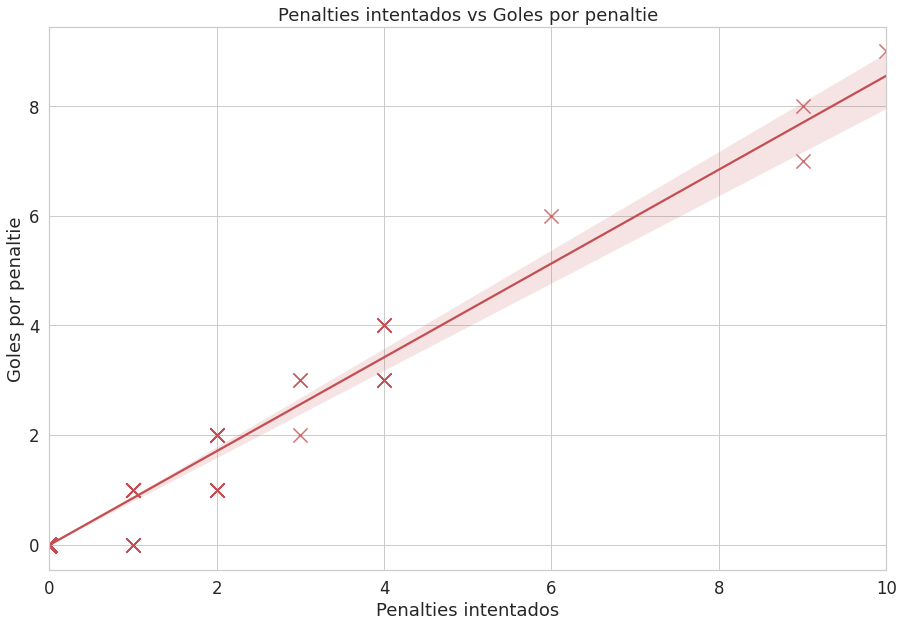

In [40]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax=sns.regplot(x='Penalty_Attempted',
              y='Penalty_Goals',
              data=df,
              color='r',
              marker='x',
              scatter_kws={'s':200})

ax.set(xlabel='Penalties intentados', ylabel='Goles por penaltie')
ax.set_title('Penalties intentados vs Goles por penaltie')

plt.show()

Más que nada estas dos variables pueden ser útiles para realizar predicciones de anotaciones por penal. El ocasionar penalties es una de los planteamientos en los juegos que ayuda a ganar partidos, directores técnicos se caracterizan por tener la idea de estar constantemente dentro del área y provocar penales en gran medida. Observando la gráfica se puede ver que en su mayoría, en toda la liga, de los penalties intentados se falla uno en promedio y los demás son anotados, analizar esta característica y mejorar la habilidad dentro de los jugadores de la plantilla puede salvar partidos a los clubes. 

# 6.- Conclusiones

A manera de conclusión se pueden resaltar los siguientes puntos:

-Los equipos tieden a tener un porcentaje e pases completados altos, de entre 76%-87% de efectividad. Además el número de pases intentados es relativamente alto, esto puede indicar que existe una gran cantidad de movimientos y participación entre todos los jugadores del equipo. Profundizando un poco más, para poder realizar este tipo de juegos se requeriían jugadores con un control y habilidad con el balón de nivel bueno o alto, ya que el estar movilizando la pelota constantemente indica que se están intentando crear espacios necesarios para proceder a atacar por lo que pasa por todos los jugadores. Estos se enfrentarán a la presión constante del rival por lo que no solo los delanteros y el meddio campo ofensivo debe de ser hábil con el balón sino el equipo defensivo también, esto aparte de generar más espacios y dar una visión más amplia da también seguridad en la portería propia. Agregando también que si existe tal cantidad de pases se puede estar hablando de una preferencia por la posesión de la pelota.

-El promedio de edades se mantiene entre el rango de 23-28 años de edad. Retomando el estatuto de que los equipos consideran buenos jugadores a aquellos desde 30 años hacia abajo, el que se cuente con este promedio habla de que la composición de los equipos con mayores promedios de gol son por jugadores que están en su juventud y se dirigen hacia "el mejor estado de su carrera futbolística". Es decir, intentan conservar jugadores que se encuentren no solo en un buen momento futbolístico sino también que tengan proyección a futuro dentro de unos años, lo suficiente para poder rendir y si se requiere ser vendidos a buen precio a otros equipos.

-La información de las tarjetas amarillas y rojas sugiere que los equipos con mejores promedios e gol presentan tendencia a un juego de contacto elevado pero inteligente, se permiten tener un número importante de tarjetas amarillas pero no pasar a las expulsiones. Esto se puede traducir en que, además de que presentan preferencia por la posesión del juego a través del balón no dejan que el rival construya su propio ritmo del juego al cortar su avance constantemente. Ello se puede ver si se plantea la siguiente línea de pensamiento, el hecho de que haya un número importante de tarjetas amarillas significa que antes hubo series de faltas que terminan en una sanción, es decir, las tarjetas amarillas indicarían (en su mayoría) un resultado de un número elevado de faltas, y si esto es así, el modo de juego de estos equipos cuenta con otra característica que es el uso del juego físico para no dejar que el rival hile sus propias jugadas de la manera en que ellos lo hacen. 

-El analizar los goles que tienen las posiciones por equipo es una práctica importante que no se debe de dejar pasar. Aunque los promedios de los goles solo identifican los equipos con mayor número de goles, verlos de manera desgloasada da información de los distintos modos de juego de los equipos, justo como se tomaba la comparativa entre Manchester City y Liverpool FC. Estas cualidades invitan a analizar los juegos y a los clubes de manera distinta y adecuada según su naturaleza de juego, proporciona también información útil de las diferentes opciones existentes en las que se estructuran las plantillas y permite a la administración ajustarse a alguno de ellos de acuerdo a su situación económica. 

-Por último se suigiere el tratamineto de los penalties de una forma predictiva y que además se trabaje constantemente en los entrenamientos para aumentar la tasa de gol y probabilidad por penaltieque surga en los encuentros.

En resumen, el objetivo de tomar la variable "Goles" con una perspectiva central es debido a que las mismas anotaciones se traducen en espectáculo llamativo para los aficionados. Las constantes anotaciones llevan consigo emoción en las personas, festejos y sobre todo un mayor interés en seguir a los clubes, es por ello que esto se traduciría en un exito económico al invitar a las personas a no dejar de asistir y ver los juegos además de la compra de sus artículos. En otras palabras, buscar mejorar el rendimiento en cuanto a los goles significaría un mejor rendimiento deportivo y económico. Por lo tanto, reuniendo todo el análisis realizado durante esta investigación, las características mencionadas y enlistadas en las conclusiones son las que conforman a los equipos con mayores goles en la liga premier. 

Para dar una mayor confianza en la selección de técnicos, jugadores y modos de juego, sugiero seguir con la investigación a un nivel más específico una vez se haya tomado en cuenta las posibilidades que el sustento económico del club puede abarcar. Partiendo desde ese punto se puede visualizar la lista de cantidad, los distintos modos de juegos y hacer una conjunción entre todos los factores mencionados en la investigación.